# Titanic Dataset Investigation

The objective of this investigation is to determine chances of survival of a passenger based on:
1. Age
2. Gender
3. Number of siblings and spouses aboard
4. Number of parents and children aboard

This investigation therefore answers the following question: "How likely a passenger would survive, based on age, gender, ticket class and number of siblings and spouses aboard and number of parents and children aboard"

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
titanic = pd.read_csv("titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic = pd.DataFrame(titanic)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Wrangling

Removing the attributes that are not required in investigation

In [4]:
titanic = titanic.drop(['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


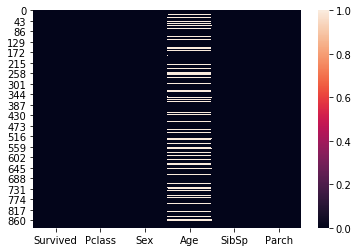

In [5]:
sns.heatmap(titanic.isnull())

In [7]:
titanic['Age'].isnull().sum()

177

In [8]:
titanic = titanic[titanic['Age'].notnull()]

In [9]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [10]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 6 columns):
Survived    714 non-null int64
Pclass      714 non-null int64
Sex         714 non-null object
Age         714 non-null float64
SibSp       714 non-null int64
Parch       714 non-null int64
dtypes: float64(1), int64(4), object(1)
memory usage: 39.0+ KB


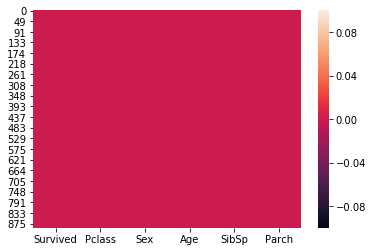

In [11]:
sns.heatmap(titanic.isnull())

# Survivors

Objective of this investigation is to determine chances of survival of a passenger based on their age, sex, class, number of siblings and parents aboard.

0 and 1 representing 'not survived' and 'survived' respectively.

# Survival based on Age

In [35]:
survivors = titanic.groupby('Survived')['Age']
survivors.describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,424.0,30.626179,14.172110,1.00,21.0,28.0,39.0,74.0
1,290.0,28.343690,14.950952,0.42,19.0,28.0,36.0,80.0


Text(0.5, 1.0, 'Comparison of survivors v/s non survivors based on age')

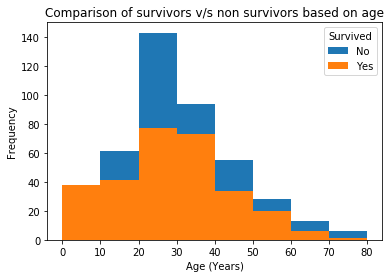

In [36]:
ax1, ax2 = survivors.plot(kind='hist', bins=range(0, 90, 10))
ax1.set_xlabel('Age (Years)')
ax1.legend(['No', 'Yes'], title='Survived')
ax2.set_ylabel('Frequency')
plt.title('Comparison of survivors v/s non survivors based on age')

From the results it can be concluded that age is not a determining factor for survival as the shape of the histogram is almost the same for both survivors and non survivors with the exception of children.

# Survival based on Gender

In [21]:
survivors = titanic.groupby('Survived')['Sex']
survivors.describe()

,count,unique,top,freq
Survived,,,,
0,424,2,male,360
1,290,2,female,197


Text(0.5, 1.0, 'Comparison of survivors v/s non survivors based on sex')

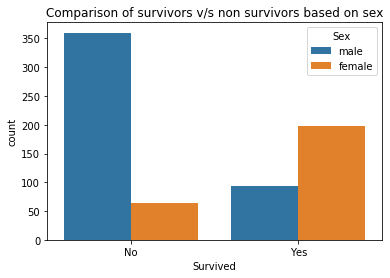

In [26]:
sns.countplot(x="Survived",hue="Sex",data=titanic)
plt.xticks([0, 1], ['No', 'Yes'])
plt.title('Comparison of survivors v/s non survivors based on sex')

From the results, it can be concluded that more females survived than males.

# Survival based on Ticket Class

In [38]:
survivors = titanic.groupby('Survived')['Pclass']
survivors.describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,424.0,2.485849,0.743633,1.0,2.0,3.0,3.0,3.0
1,290.0,1.872414,0.836617,1.0,1.0,2.0,3.0,3.0


([<matplotlib.axis.XTick at 0x269c5a3da90>,
 <a list of 2 Text xticklabel objects>)

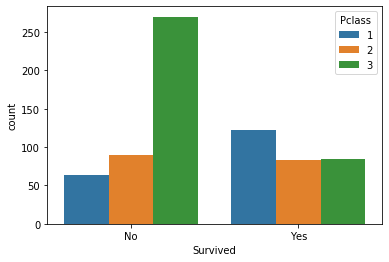

In [39]:
sns.countplot(x="Survived",hue="Pclass",data=titanic)
plt.xticks([0, 1], ['No', 'Yes'])

From the results, it can be concluded that first and second class passengers had higher chances of survival than third class passengers.

# Survival based on Siblings and Spouses aboard

In [48]:
survivors = titanic.groupby('Survived')['SibSp']
survivors.describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,424.0,0.525943,1.044760,0.0,0.0,0.0,1.0,5.0
1,290.0,0.493103,0.731132,0.0,0.0,0.0,1.0,4.0


([<matplotlib.axis.XTick at 0x269c5dce588>,
 <a list of 2 Text xticklabel objects>)

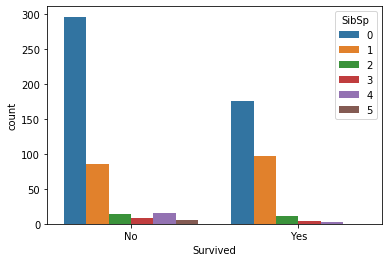

In [49]:
sns.countplot(x="Survived",hue="SibSp",data=titanic)
plt.xticks([0, 1], ['No', 'Yes'])

From the results it can be concluded that having siblings and spouses aboard is not a factor determining survival of a passenger.

# Survival based on Parents and Children aboard

([<matplotlib.axis.XTick at 0x269c5e361d0>,
 <a list of 2 Text xticklabel objects>)

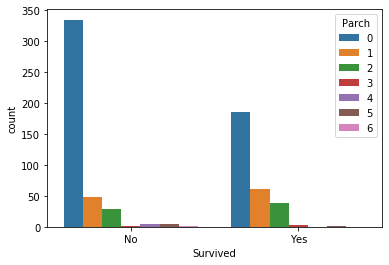

In [50]:
sns.countplot(x="Survived",hue="Parch",data=titanic)
plt.xticks([0, 1], ['No', 'Yes'])

From the results, it can be concluded that having parents and children aboard is not a factor determining survival of a passenger.

# Conclusion

From the analysis, it can be concluded that factors determining a passengers survival are:

1. Ticket class of the passenger
2. Gender of the passenger